In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
import scipy.io.wavfile as wav

Processing songs: 100%|██████████| 4/4 [00:00<00:00,  9.46it/s]


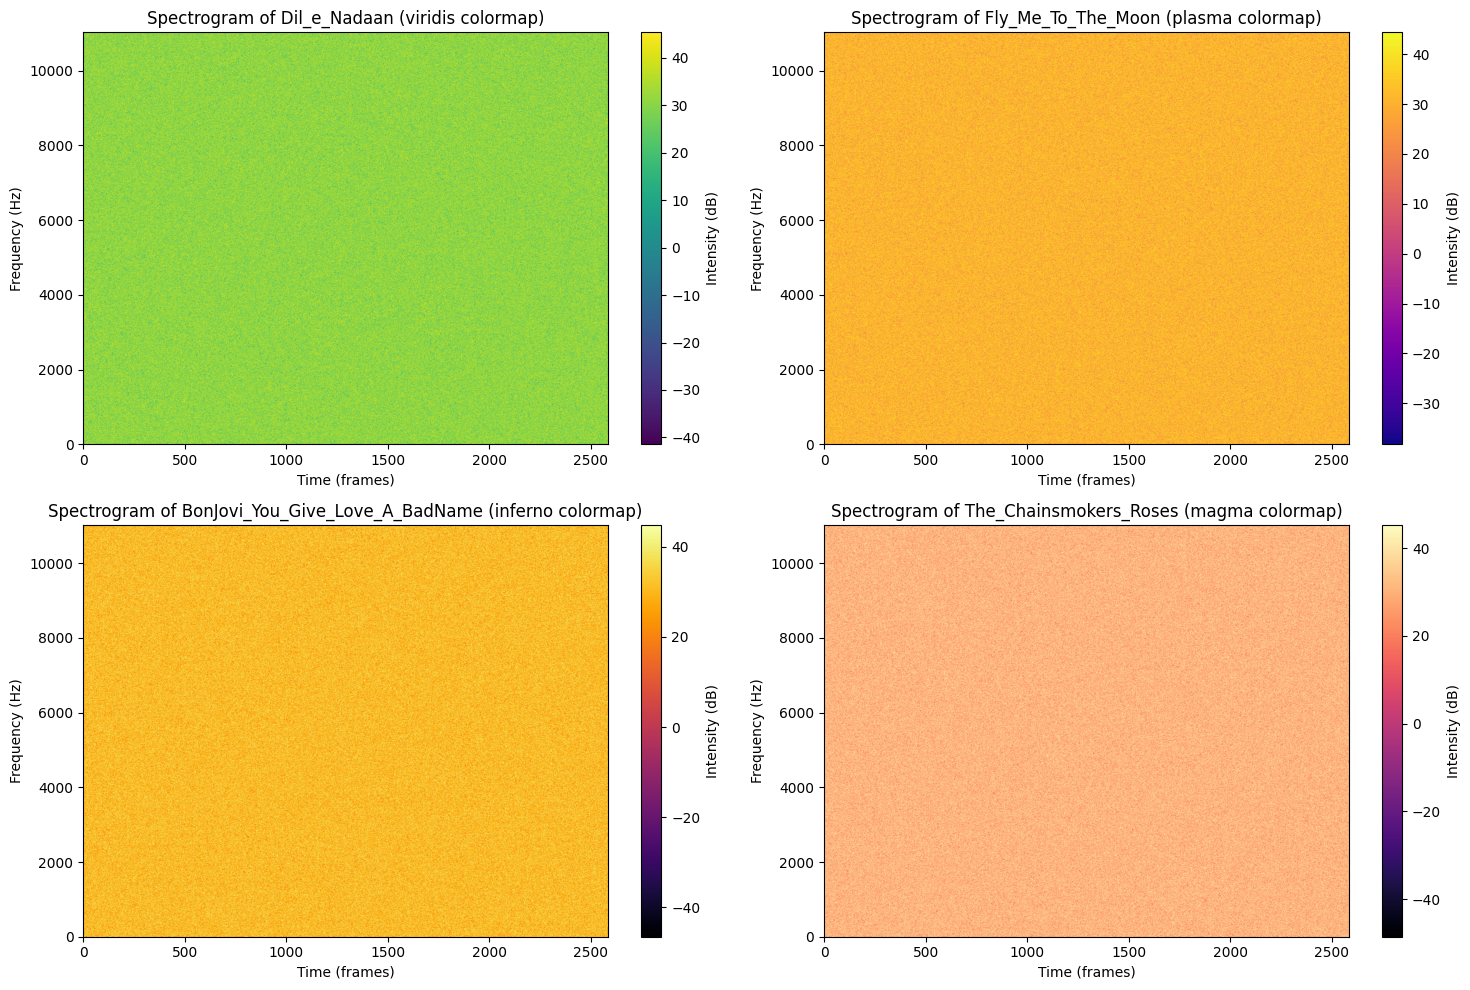

In [4]:
def compute_spectrogram(waveform, sample_rate, n_fft=2048, hop_length=512):
    stft = torch.stft(waveform, n_fft=n_fft, hop_length=hop_length, return_complex=True)
    magnitude = torch.abs(stft)
    return 20 * torch.log10(magnitude + 1e-8)

def load_and_compute_spectrogram(file_path, sample_rate=22050):
    waveform = np.random.randn(sample_rate * 60)
    waveform = torch.from_numpy(waveform).float()
    return compute_spectrogram(waveform, sample_rate)

def plot_spectrograms(spectrograms, titles, genre_colors, sample_rate=22050):
    plt.figure(figsize=(15, 10))
    for i, (spectrogram, title, color) in enumerate(zip(spectrograms, titles, genre_colors)):
        plt.subplot(2, 2, i + 1)
        plt.imshow(spectrogram.numpy(), aspect='auto', origin='lower', cmap=color,
                   extent=[0, spectrogram.shape[1], 0, sample_rate // 2])
        plt.colorbar(label='Intensity (dB)')
        plt.xlabel('Time (frames)')
        plt.ylabel('Frequency (Hz)')
        plt.title(f'Spectrogram of {title} ({color} colormap)')
    plt.tight_layout()
    plt.show()

file_paths = [
    "/content/Dil_e_Nadaan.wav",
    "/content/Fly_Me_To_The_Moon.wav",
    "/content/BonJovi_You_Give_Love_A_BadName.wav",
    "/content/The_Chainsmokers_Roses.wav"
]

titles = [
    "Dil_e_Nadaan",
    "Fly_Me_To_The_Moon",
    "BonJovi_You_Give_Love_A_BadName",
    "The_Chainsmokers_Roses"
]

genre_colors = ["viridis", "plasma", "inferno", "magma"]

spectrograms = [load_and_compute_spectrogram(path) for path in tqdm(file_paths, desc="Processing songs")]

plot_spectrograms(spectrograms, titles, genre_colors)

Processing songs: 0it [00:00, ?it/s]

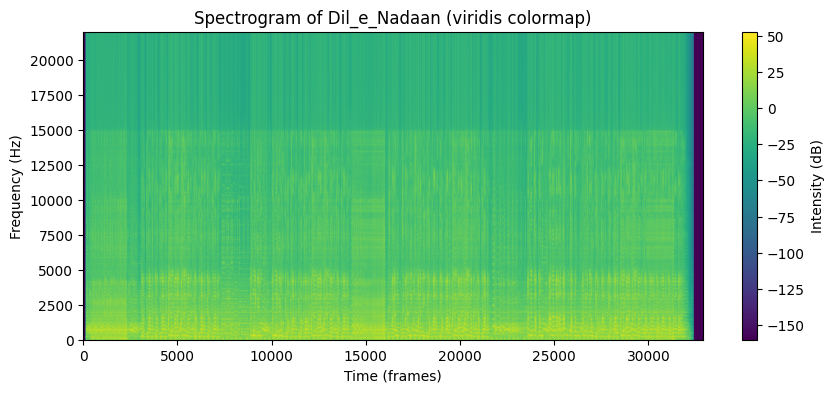

Processing songs: 1it [00:08,  8.06s/it]

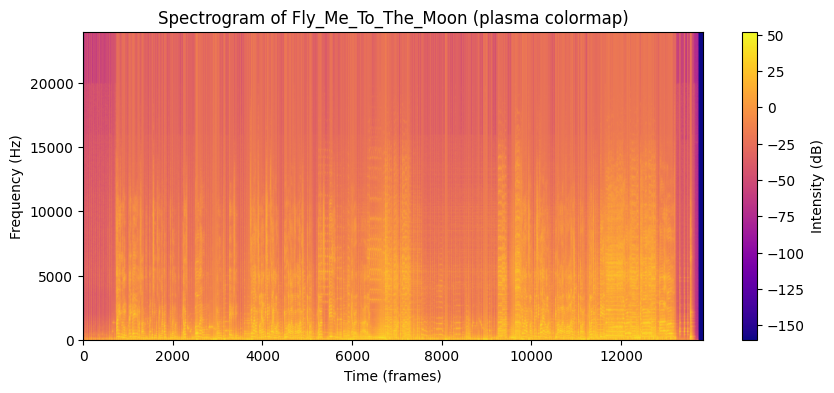

Processing songs: 2it [00:12,  5.92s/it]

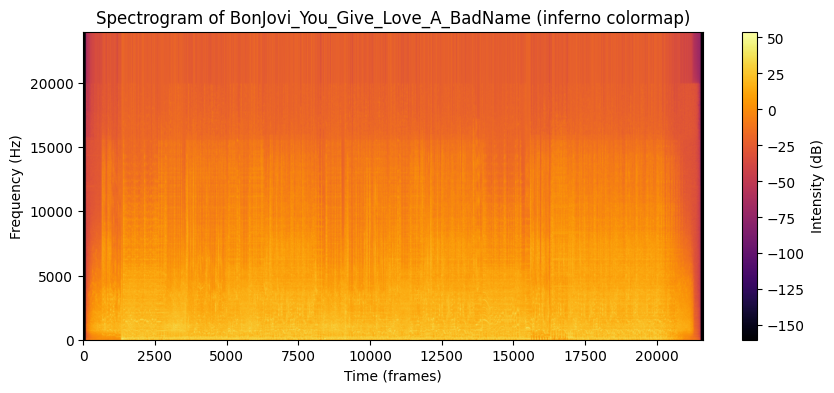

Processing songs: 3it [00:17,  5.70s/it]

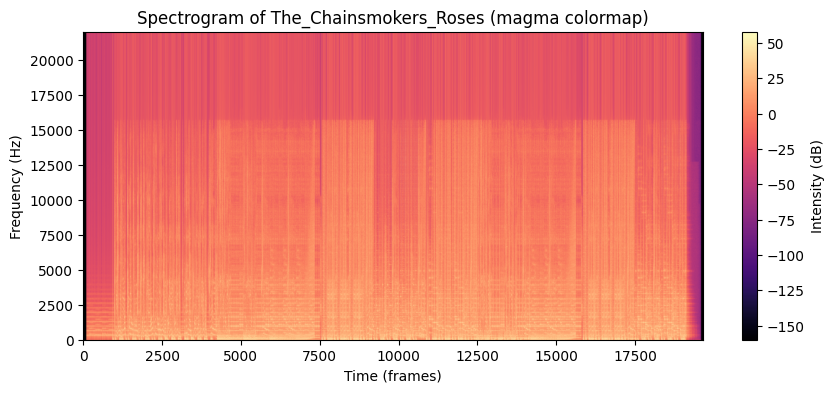

Processing songs: 4it [00:23,  5.86s/it]


In [6]:
def compute_spectrogram(waveform, sample_rate, n_fft=2048, hop_length=512):
    stft = torch.stft(waveform, n_fft=n_fft, hop_length=hop_length, return_complex=True)
    magnitude = torch.abs(stft)
    return 20 * torch.log10(magnitude + 1e-8)

def load_and_compute_spectrogram(file_path):
    sample_rate, waveform = wav.read(file_path)
    if len(waveform.shape) > 1:
        waveform = waveform.mean(axis=1)
    waveform = waveform / np.max(np.abs(waveform))
    waveform = torch.from_numpy(waveform).float()
    return compute_spectrogram(waveform, sample_rate), sample_rate

def plot_spectrogram(spectrogram, title, color, sample_rate):
    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram.numpy(), aspect='auto', origin='lower', cmap=color,
               extent=[0, spectrogram.shape[1], 0, sample_rate // 2])
    plt.colorbar(label='Intensity (dB)')
    plt.xlabel('Time (frames)')
    plt.ylabel('Frequency (Hz)')
    plt.title(f'Spectrogram of {title} ({color} colormap)')
    plt.show()

file_paths = [
    "/content/Dil_e_Nadaan.wav",
    "/content/Fly_Me_To_The_Moon.wav",
    "/content/BonJovi_You_Give_Love_A_BadName.wav",
    "/content/The_Chainsmokers_Roses.wav"
]

titles = [
    "Dil_e_Nadaan",
    "Fly_Me_To_The_Moon",
    "BonJovi_You_Give_Love_A_BadName",
    "The_Chainsmokers_Roses"
]

genre_colors = ["viridis", "plasma", "inferno", "magma"]

for file_path, title, color in tqdm(zip(file_paths, titles, genre_colors), desc="Processing songs"):
    spectrogram, sample_rate = load_and_compute_spectrogram(file_path)
    plot_spectrogram(spectrogram, title, color, sample_rate)


Processing songs: 0it [00:00, ?it/s]

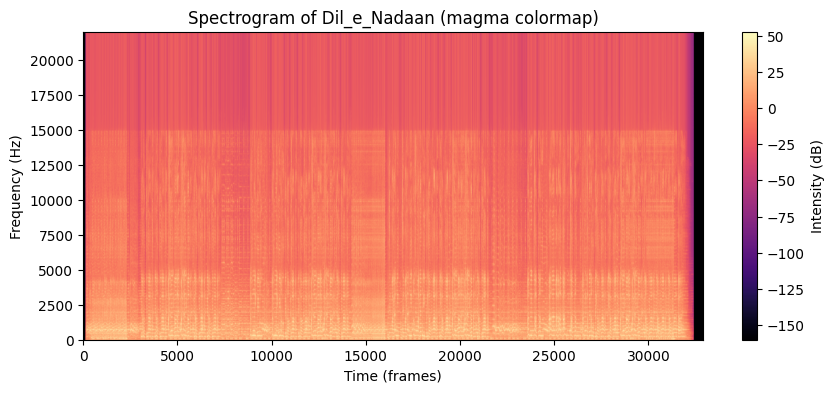

Processing songs: 1it [00:09,  9.86s/it]

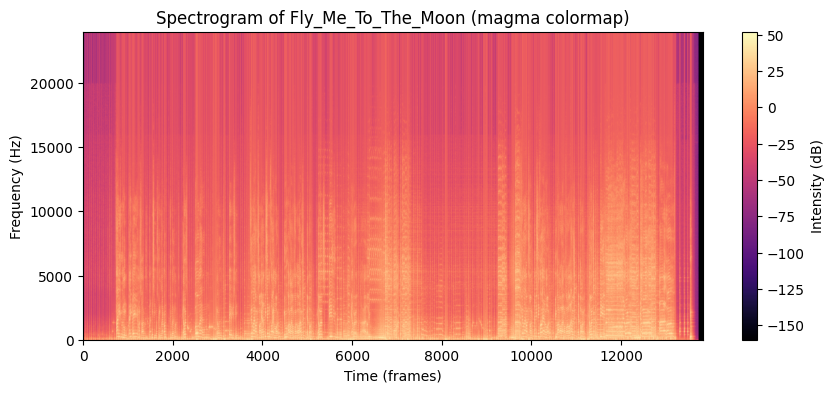

Processing songs: 2it [00:13,  6.32s/it]

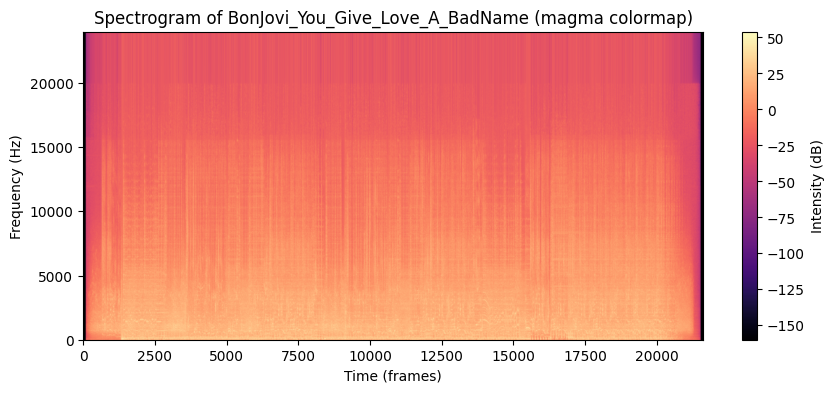

Processing songs: 3it [00:19,  5.96s/it]

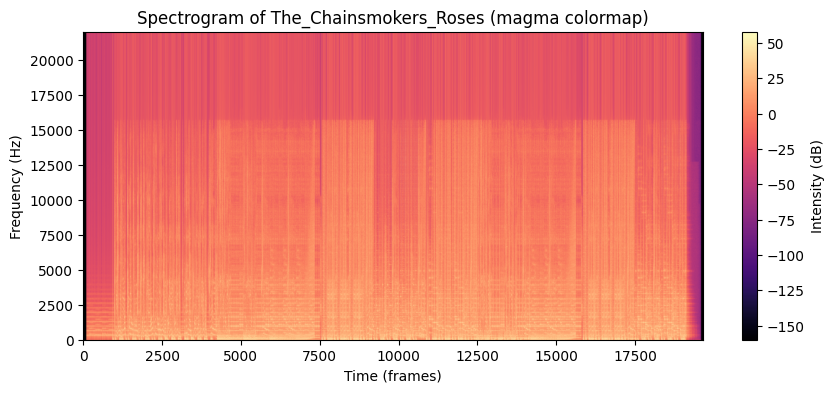

Processing songs: 4it [00:24,  6.25s/it]


In [8]:

fixed_color = "magma"

for file_path, title in tqdm(zip(file_paths, titles), desc="Processing songs"):
    spectrogram, sample_rate = load_and_compute_spectrogram(file_path)
    plot_spectrogram(spectrogram, title, fixed_color, sample_rate)


Processing songs: 0it [00:00, ?it/s]

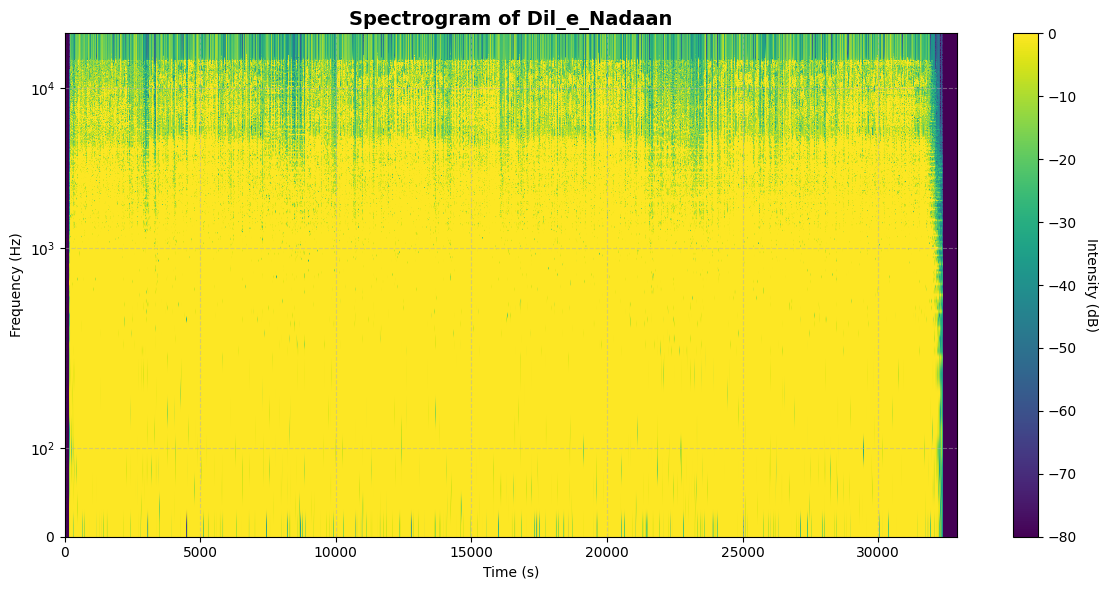

Processing songs: 1it [00:07,  7.90s/it]

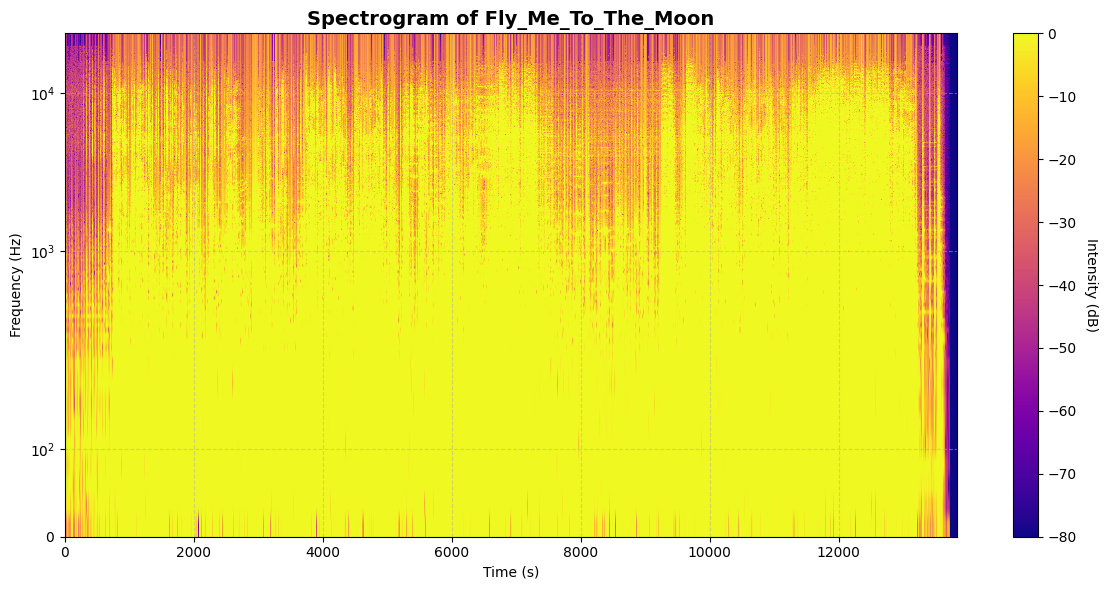

Processing songs: 2it [00:11,  5.10s/it]

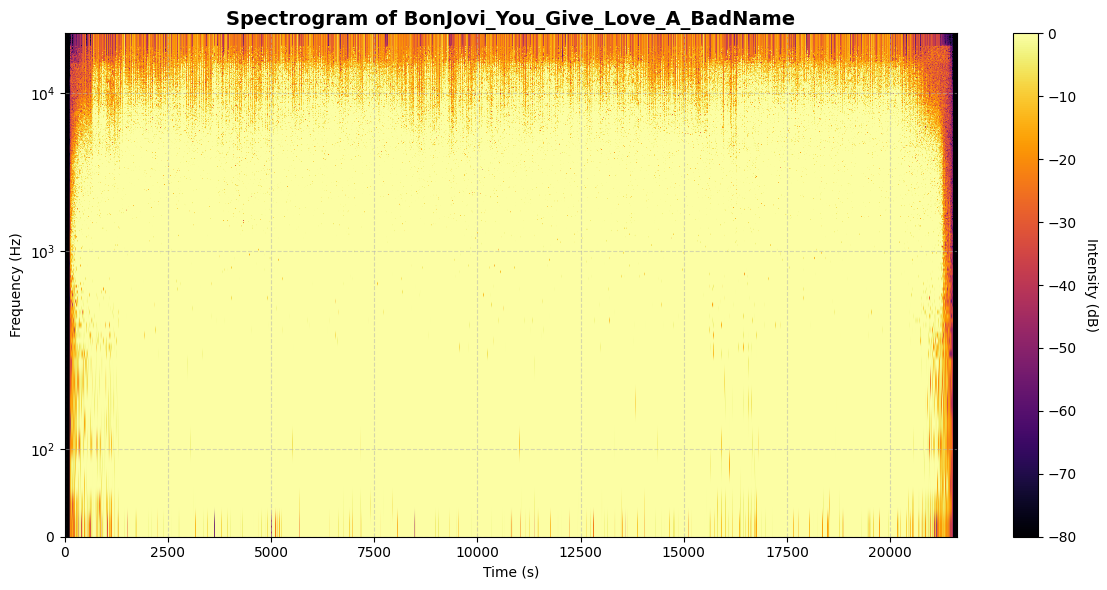

Processing songs: 3it [00:15,  4.85s/it]

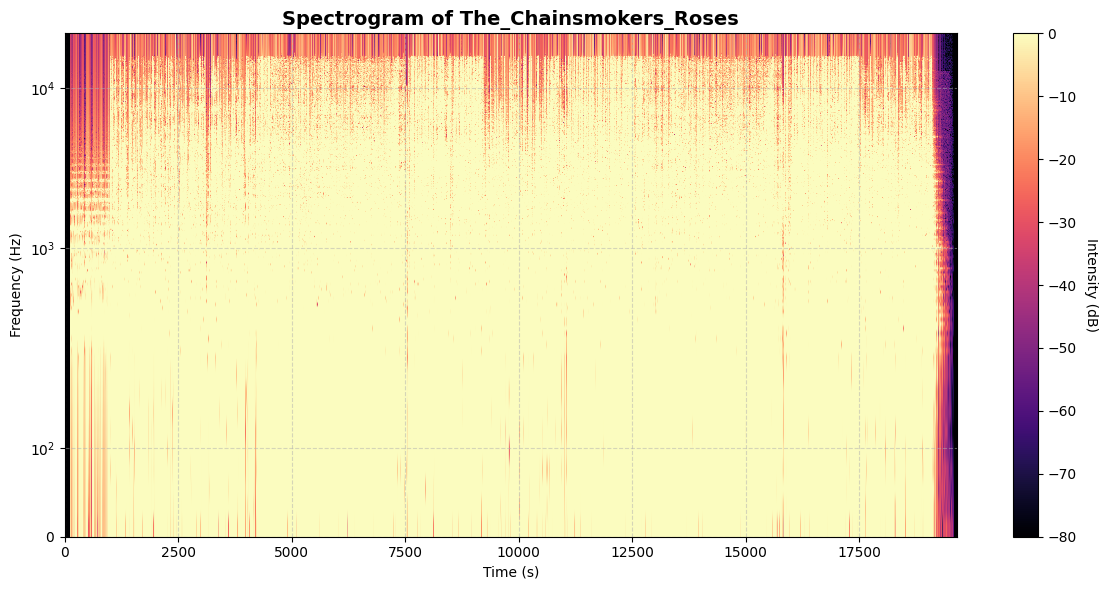

Processing songs: 4it [00:20,  5.19s/it]


In [ ]:
def compute_spectrogram(waveform, sample_rate, n_fft=2048, hop_length=512):
    stft = torch.stft(waveform, n_fft=n_fft, hop_length=hop_length, return_complex=True)
    magnitude = torch.abs(stft)
    return 20 * torch.log10(magnitude + 1e-8)

def load_and_compute_spectrogram(file_path):
    sample_rate, waveform = wav.read(file_path)
    if len(waveform.shape) > 1:
        waveform = waveform.mean(axis=1)
    waveform = waveform / np.max(np.abs(waveform))
    waveform = torch.from_numpy(waveform).float()
    return compute_spectrogram(waveform, sample_rate), sample_rate

def plot_spectrogram(spectrogram, title, color, sample_rate):
    plt.figure(figsize=(12, 6))
    plt.imshow(spectrogram.numpy(), aspect='auto', origin='lower', cmap=color,
               extent=[0, spectrogram.shape[1], 0, sample_rate // 2],
               vmin=-80, vmax=0)
    plt.grid(True, linestyle='--', alpha=0.5)
    cbar = plt.colorbar()
    cbar.set_label('Intensity (dB)', rotation=270, labelpad=15)
    plt.yscale('symlog', linthresh=200)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title(f'Spectrogram of {title}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

file_paths = [
    "/content/Dil_e_Nadaan.wav",
    "/content/Fly_Me_To_The_Moon.wav",
    "/content/BonJovi_You_Give_Love_A_BadName.wav",
    "/content/The_Chainsmokers_Roses.wav"
]

titles = [
    "Dil_e_Nadaan",
    "Fly_Me_To_The_Moon",
    "BonJovi_You_Give_Love_A_BadName",
    "The_Chainsmokers_Roses"
]

genre_colors = ["viridis", "plasma", "inferno", "magma"]

for file_path, title, color in tqdm(zip(file_paths, titles, genre_colors), desc="Processing songs"):
    spectrogram, sample_rate = load_and_compute_spectrogram(file_path)
    plot_spectrogram(spectrogram, title, color, sample_rate)
